In [1]:
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# read in crime data

crime = pd.read_csv('crimes.csv')
crime = crime[['Block_Location']]
pattern = '\((.*)\)'

def extract_coords(given_string, split, lat_first = True):
    s = re.search(pattern, given_string).group(1)
    coords = s.split(split)
    if lat_first:
        return float(coords[1]), float(coords[0])
    return float(coords[0]), float(coords[1])

crime['Block_Location'] = crime['Block_Location'].apply(extract_coords, args = (', ', True))
display(crime)

,Block_Location
0,"(-122.270455, 37.869058)"
1,"(-122.270455, 37.869058)"
2,"(-122.269644, 37.861843)"
3,"(-122.268002, 37.858116)"
4,"(-122.268285, 37.871167)"
...,...
2583,"(-122.251595, 37.865868)"
2584,"(-122.297498, 37.88014)"
2585,"(-122.258331, 37.865134)"
2586,"(-122.277231, 37.878986)"


In [3]:
# convert the dataframe to a geodataframe with a column of points

from shapely.geometry import Point

crime['geometry'] = crime['Block_Location'].apply(Point)
crime_gdf = gpd.GeoDataFrame(
    crime, geometry = 'geometry', crs = 'EPSG:4326')
display(crime_gdf)
display(crime_gdf.crs)

,Block_Location,geometry
0,"(-122.270455, 37.869058)",POINT (-122.27045 37.86906)
1,"(-122.270455, 37.869058)",POINT (-122.27045 37.86906)
2,"(-122.269644, 37.861843)",POINT (-122.26964 37.86184)
3,"(-122.268002, 37.858116)",POINT (-122.26800 37.85812)
4,"(-122.268285, 37.871167)",POINT (-122.26829 37.87117)
...,...,...
2583,"(-122.251595, 37.865868)",POINT (-122.25159 37.86587)
2584,"(-122.297498, 37.88014)",POINT (-122.29750 37.88014)
2585,"(-122.258331, 37.865134)",POINT (-122.25833 37.86513)
2586,"(-122.277231, 37.878986)",POINT (-122.27723 37.87899)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
import contextily as cx

def plot_region(x_min, x_max, y_min, y_max): # x = longitude, y = latitude
    ax = crime_gdf.plot(figsize=(10, 10), alpha=.3, edgecolor='k')
    ax.set_xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    cx.add_basemap(ax, crs=crime_gdf.crs)

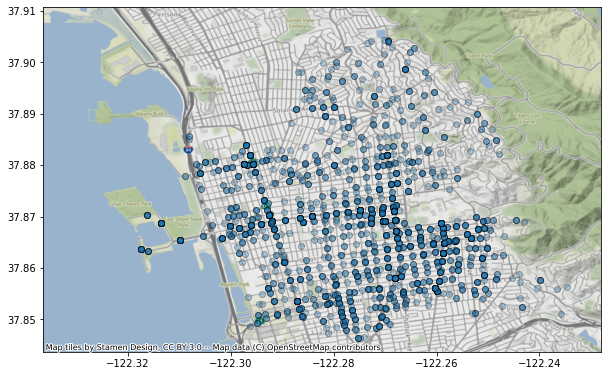

In [5]:
# entire city of berkeley
plot_region(-122.33657, -122.22803, 37.84369, 37.91079)

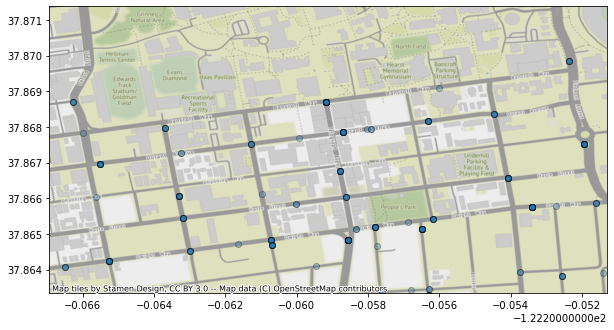

In [6]:
# people's park area
plot_region(-122.26694, -122.25129, 37.86335, 37.87138)